# Inverse Nataf transformation

Author: Dimitris G. Giovanis,
Date: June 25, 2018

Description:

In [1]:
#Import necessary libraries
from UQpy.SampleMethods import MCS, Correlate, Nataf, InvNataf
import numpy as np
import matplotlib.pyplot as plt

UQpy: Performing MCS design...
Done!
Correlation matrix in the original space
[[ 1.   0.9]
 [ 0.9  1. ]]
Correlation matrix in the transformed space
[[ 1.          0.89145613]
 [ 0.89145613  1.        ]]


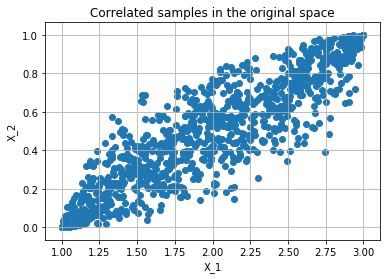

In [2]:
# Generate non-Gaussian correlated random variables
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Define the Gaussian correlation matrix of the random variables
Rho_G = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the original space')
print(Rho_G)

# Perform the nataf transformation
z = Nataf(samples=x, corr_norm=Rho_G, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])
print('Correlation matrix in the transformed space')
print(z.corr)

plt.figure()
plt.title('Correlated samples in the original space')
plt.scatter(z.samples_x[:, 0], z.samples_x[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()  

In [3]:
# Perform the inverse Nataf transformation
X = z.samples_x
Rho_NG = z.corr
p = InvNataf(samples=X, corr=Rho_NG, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])
print('Transformed Correlation matrix in the standard normal space')
print(p.corr_norm)

Transformed Correlation matrix in the standard normal space
[[ 1.   0.9]
 [ 0.9  1. ]]


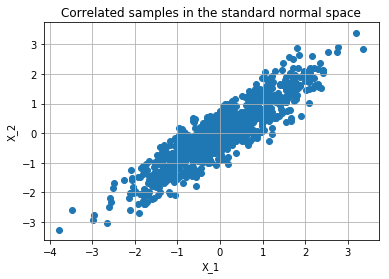

In [4]:
plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(p.samples_z[:, 0], p.samples_z[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

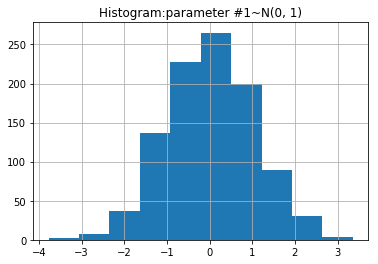

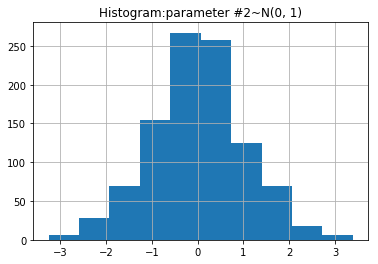

In [5]:
# Plot the distribution of the variables in the standard normal space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~N(0, 1)')
plt.hist(p.samples_z[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~N(0, 1)')
plt.hist(p.samples_z[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [6]:
#Generate non-Gaussian uncorrelated random variables
Rho_NG = np.array([[1.0, 0.5], [0.5, 1.0]])
x_ = MCS(dimension=2, dist_name=['Lognormal', 'Gumbel'], dist_params=[[10, 0.2], [20, 0.25]], nsamples=100)

UQpy: Performing MCS design...
Done!


/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1893: RuntimeWarning: invalid value encountered in true_divide
  sc.expm1(sc.gammaln(2.0*c+1.0)-2*sc.gammaln(c + 1.0))/c**2.0)
/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1895: RuntimeWarning: invalid value encountered in true_divide
  gamk = np.where(abs(c) < eps, -_EULER, sc.expm1(sc.gammaln(c + 1))/c)
/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1902: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1907: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


In [7]:
# Transform variables to the standard normal space
p_ = InvNataf(samples=x_, corr=Rho_NG)
print(p_.corr_norm)

/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1893: RuntimeWarning: invalid value encountered in true_divide
  sc.expm1(sc.gammaln(2.0*c+1.0)-2*sc.gammaln(c + 1.0))/c**2.0)
/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1895: RuntimeWarning: invalid value encountered in true_divide
  gamk = np.where(abs(c) < eps, -_EULER, sc.expm1(sc.gammaln(c + 1))/c)
/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1902: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1907: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


[[ 1.          0.51170409]
 [ 0.51170409  1.        ]]


The random variable transformation from X space into Y space is mapped according to isoprobabilistc transformation principle

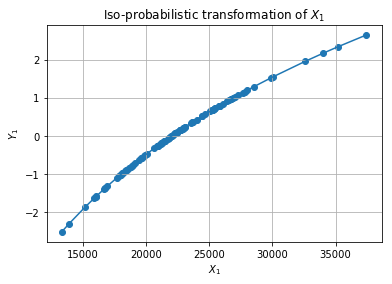

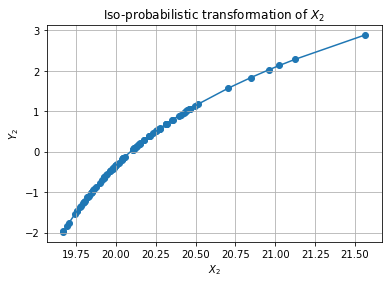

In [8]:
# Print the isoprobabilistic transformations
x1 = x_.samples[:, 0]
x2 = x_.samples[:, 1]
y1 = p_.samples_z[:, 0]
y2 = p_.samples_z[:, 1]

x1s = np.sort(x1)
I1 = np.argsort(x1)
y1s = y1[I1]


x2s = np.sort(x2)
I2 = np.argsort(x2)
y2s = y2[I2]


plt.figure()
plt.scatter(x1s, y1s, marker=r'o')
plt.plot(x1s, y1s)
plt.xlabel(r'$X_{1}$')
plt.ylabel('$Y_{1}$')
plt.title(r'Iso-probabilistic transformation of $X_{1}$')
plt.grid(True)

plt.figure()
plt.scatter(x2s, y2s,  marker=r'o')
plt.plot(x2s, y2s)
plt.xlabel(r'$X_{2}$')
plt.ylabel(r'$Y_{2}$')
plt.title(r'Iso-probabilistic transformation of $X_{2}$')
plt.grid(True)

plt.show()

In [9]:
#Generate non-Gaussian uncorrelated random variables
x3 = MCS(dimension=1, dist_name=['Uniform'], dist_params=[[0, 30]], nsamples=100)
# Transform variables to the standard normal space
p3 = InvNataf(samples=x3)

UQpy: Performing MCS design...
Done!


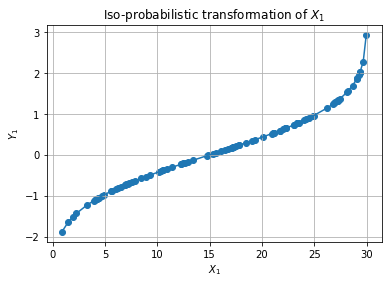

In [10]:
# Print the isoprobabilistic transformations
x1 = x3.samples[:, 0]
y1 = p3.samples_z[:, 0]

x1s = np.sort(x1)
I1 = np.argsort(x1)
y1s = y1[I1]


plt.figure()
plt.scatter(x1s, y1s, marker=r'o')
plt.plot(x1s, y1s)
plt.xlabel(r'$X_{1}$')
plt.ylabel('$Y_{1}$')
plt.title(r'Iso-probabilistic transformation of $X_{1}$')
plt.grid(True)

plt.show()